 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns

#defining the csvpath
csvpathwhales = ("Resources/whale_returns.csv")

#reading the csvpath into a dataframe & indexing the datetimeformat
whales_returns = pd.read_csv(csvpathwhales, index_col = ['Date'], infer_datetime_format=True, parse_dates = True)
whales_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whales_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whales_returns.dropna(inplace=True)
whales_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns

#defining the csvpath
csvpathalgo = ("Resources/algo_returns.csv")

#reading the csvpath into dataframe & indexing the datetime format
algo_returns = pd.read_csv(csvpathalgo, index_col = ['Date'], infer_datetime_format = True, parse_dates = True)
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace=True)
# algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices

#defining the csvpath
csvpathsp60 = ("Resources/sp_tsx_history.csv")

#reading the csv into a dataframe & indexing the datetime format
sptsx_returns = pd.read_csv(csvpathsp60, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sptsx_returns.sort_index (ascending = True)
sptsx_returns.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sptsx_returns.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sptsx_returns["Close"] = sptsx_returns["Close"]. str.replace("$","", regex = True).replace(",", "", regex = True)
sptsx_returns["Close"] = sptsx_returns["Close"].astype("float")

In [12]:
#Check Data types for confirmation
sptsx_returns.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
daily_returns = sptsx_returns.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
daily_returns = daily_returns.dropna().copy()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename (columns = {"Close" : "SP60_Close"})
daily_returns.head()

,SP60_Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
column_appended_data = pd.concat([whales_returns, algo_returns, daily_returns], axis = "columns", join="inner")
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

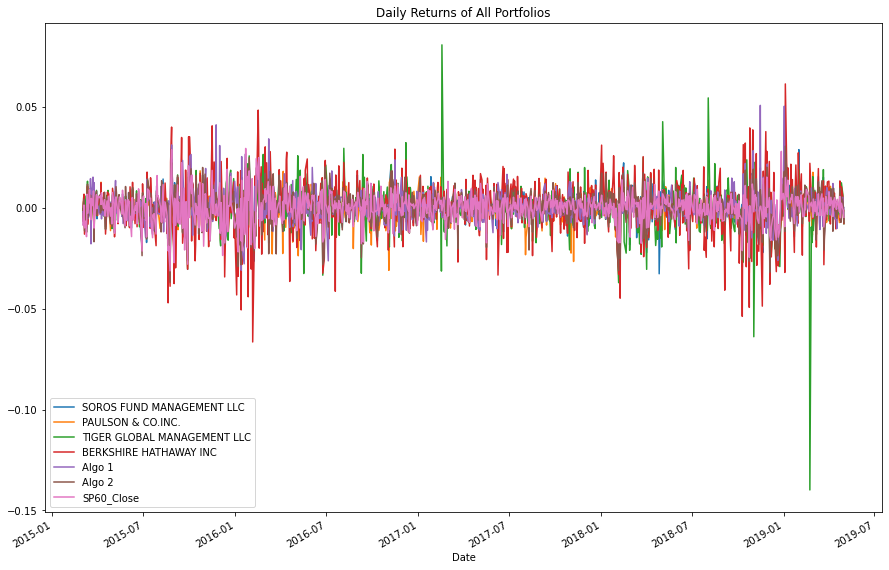

In [17]:
# Plot daily returns of all portfolios
column_appended_data.plot(figsize = (15,10), title = "Daily Returns of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

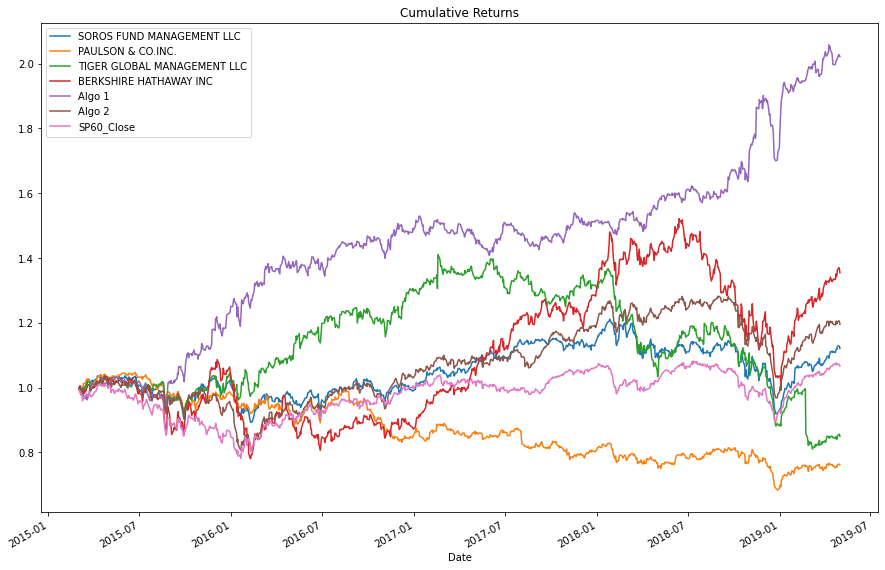

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + column_appended_data).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize = (15,10), title = "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

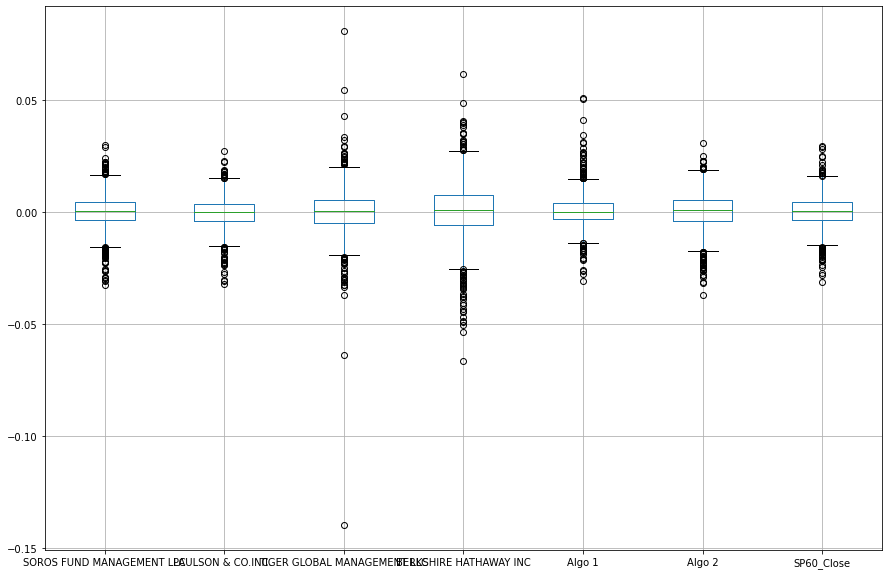

In [19]:
# Box plot to visually show risk
column_appended_data.boxplot(figsize = (15,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns.std()

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
SP60_Close                     0.064354
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
# daily_returns.std()

column_appended_data['SP60_Close'].std()

0.007034167748577725

In [22]:
# Determine which portfolios are riskier than the S&P TSX 60

round(column_appended_data.std(),4) > column_appended_data['SP60_Close'].std()

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP60_Close                     False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)

In [24]:
# using the std function and square root funtion to determine volatility of whales_returns
volatility_whales = whales_returns.std() * np.sqrt(252)

#sort values in ascending order
volatility_whales = volatility_whales.sort_values()

#display values
volatility_whales

PAULSON & CO.INC.              0.110754
SOROS FUND MANAGEMENT LLC      0.124487
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [25]:
# using the std function and square root funtion to determine volatility of algo_returns
volatility_algo = algo_returns.std() * np.sqrt(252)

#sort values in ascending order
volatility_algo = volatility_algo.sort_values()

#display values
volatility_algo

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [26]:
# using the std function and square root funtion to determine volatility of S&P_TSX_60
volatility_sptsx = daily_returns.std() * np.sqrt(252)

#sort values in ascending order
volatility_sptsx = volatility_sptsx.sort_values()

#display values
volatility_sptsx

SP60_Close    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

#Calculating rolling std for all portfolios
combined_rstd = column_appended_data.rolling(window = 21).std()

<AxesSubplot:xlabel='Date'>

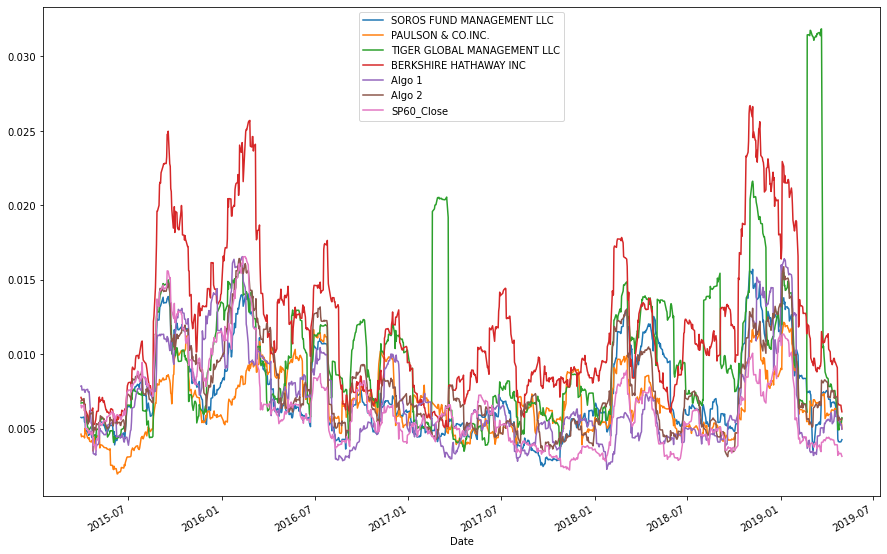

In [28]:
# Plot the rolling standard deviation
combined_rstd.plot(figsize = (15,10))

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
correlation_sp60 = column_appended_data.corr()
# Display the correlation matrix
correlation_sp60.style.background_gradient(cmap="ocean_r")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60_Close
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP60_Close,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [30]:
# correlation_sp60.plot(figsize = (15,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [31]:
# Calculate covariance of a single portfolio

#calculating covariance of algo_returns
rolling_covariance = column_appended_data['Algo 2'].rolling(window=30).cov(column_appended_data['SP60_Close'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000019
2019-04-26    0.000020
2019-04-29    0.000020
2019-04-30    0.000017
2019-05-01    0.000019
Length: 1029, dtype: float64

In [32]:
# Calculate variance of S&P TSX
variance = column_appended_data['SP60_Close'].rolling(window=30).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000016
2019-04-26    0.000016
2019-04-29    0.000015
2019-04-30    0.000014
2019-05-01    0.000015
Name: SP60_Close, Length: 1029, dtype: float64

In [33]:
# Computing beta
sptsx_beta = rolling_covariance/variance
sptsx_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.164777
2019-04-26    1.306756
2019-04-29    1.290229
2019-04-30    1.218576
2019-05-01    1.283801
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

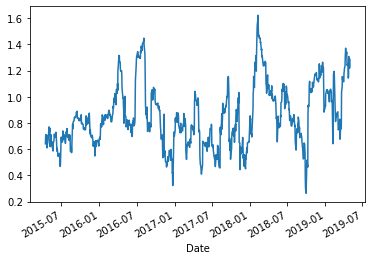

In [34]:
# Plot beta trend
sptsx_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

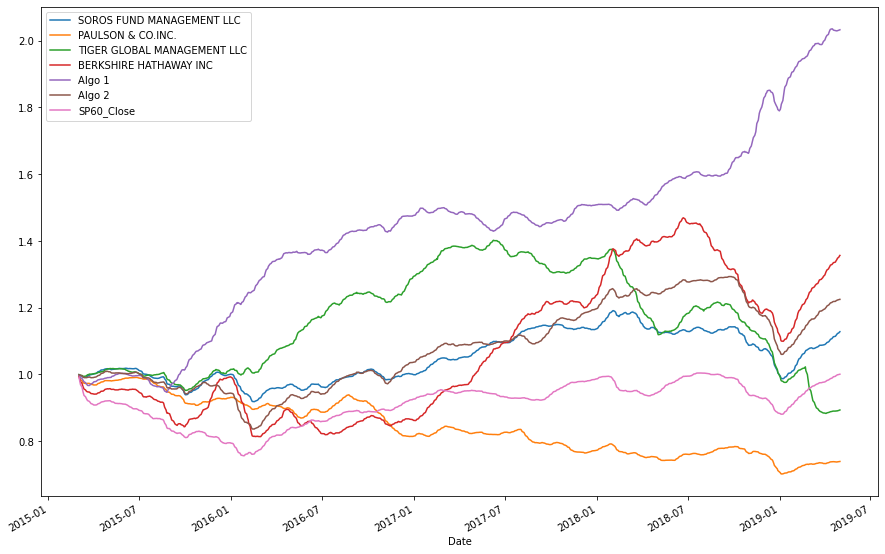

In [35]:
# Use `ewm` to calculate the rolling window
combined_df_ewm = column_appended_data.ewm(span = 21,adjust = False).mean()
(1 + combined_df_ewm).cumprod().plot(figsize = (15,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios
sharpe_ratios = column_appended_data.mean()*252/(column_appended_data.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP60_Close                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

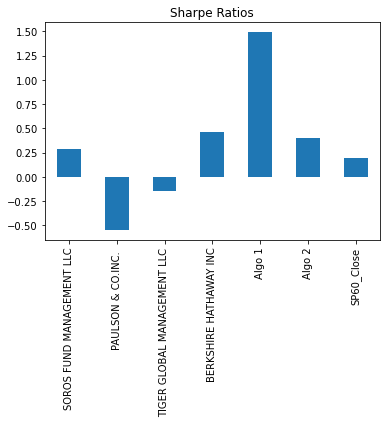

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [38]:
# Reading data from 1st stock

#defining the csvpath
csvpathotex = ("Resources/otex_historical.csv")

#reading the csvpath
otex_df = pd.read_csv(csvpathotex, index_col = 'Date',infer_datetime_format = True, parse_dates = True)
otex_df.drop(columns=['Symbol'], inplace=True)
otex_df.rename(columns = {"Close":"Otex_Close"}, inplace = True)
otex_df.head()

,Otex_Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [39]:
# Reading data from 2nd stock

#defining the csvpath
csvpathshop = ("Resources/shop_historical.csv")

#reading the csvpath
shop_df = pd.read_csv(csvpathshop, index_col = 'Date',infer_datetime_format = True, parse_dates = True)
shop_df.drop(columns=['Symbol'], inplace=True)
shop_df.rename(columns = {"Close":"Shop_Close"}, inplace = True)
shop_df.head()

,Shop_Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [40]:
# Reading data from 3rd stock

#defining the csvpath
csvpathihis = ("Resources/l_historical.csv")

#reading the csvpath
ihis_df = pd.read_csv(csvpathihis, index_col = 'Date',infer_datetime_format = True, parse_dates = True)
ihis_df.drop(columns=['Symbol'], inplace=True)
ihis_df.rename(columns = {"Close":"Ihis_Close"}, inplace = True)
ihis_df.head()

,Ihis_Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [41]:
# Combine all stocks in a single DataFrame

#rename and drop the columns
combine_data = pd.concat([otex_df, shop_df, ihis_df], axis = "columns", join="inner")
combine_data.head()

,Otex_Close,Shop_Close,Ihis_Close
Date,,,
2018-01-02,43.58,132.06,57.99
2018-01-03,43.07,135.15,57.41
2018-01-04,42.91,137.46,57.42
2018-01-05,42.57,137.26,57.42
2018-01-08,42.16,139.51,56.86


In [42]:
# Reset Date index
combine_data.index = combine_data.index.normalize()

already done in previous steps

In [43]:
# Reorganize portfolio data by having a column per symbol

In [44]:
# Calculate daily returns
combine_daily = combine_data.pct_change()

# Drop NAs
combine_daily = combine_daily.dropna()

# Display sample data
combine_daily.head()

,Otex_Close,Shop_Close,Ihis_Close
Date,,,
2018-01-03,-0.011703,0.023398,-0.010002
2018-01-04,-0.003715,0.017092,0.000174
2018-01-05,-0.007924,-0.001455,0.000000
2018-01-08,-0.009631,0.016392,-0.009753
2018-01-09,-0.000712,-0.011254,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combine_daily.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [52]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((portfolio_returns,column_appended_data), axis = "columns", join = "inner")
portfolio_returns.rename(columns = {0:"assign_portfolio"}, inplace = True)
portfolio_returns

,assign_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60_Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60_Close
Date,,,,,,,,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [53]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns = portfolio_returns.dropna()
portfolio_returns.head()

,assign_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60_Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60_Close
Date,,,,,,,,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
assign_portfolio,0.014132
SOROS FUND MANAGEMENT LLC,0.009177
PAULSON & CO.INC.,0.007203
TIGER GLOBAL MANAGEMENT LLC,0.013848
BERKSHIRE HATHAWAY INC,0.014328
Algo 1,0.007561
Algo 2,0.008672
SP60_Close,0.006244
SOROS FUND MANAGEMENT LLC,0.009177
PAULSON & CO.INC.,0.007203


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'ROLLING STD 21 DAYS WINDOW'}, xlabel='Date'>

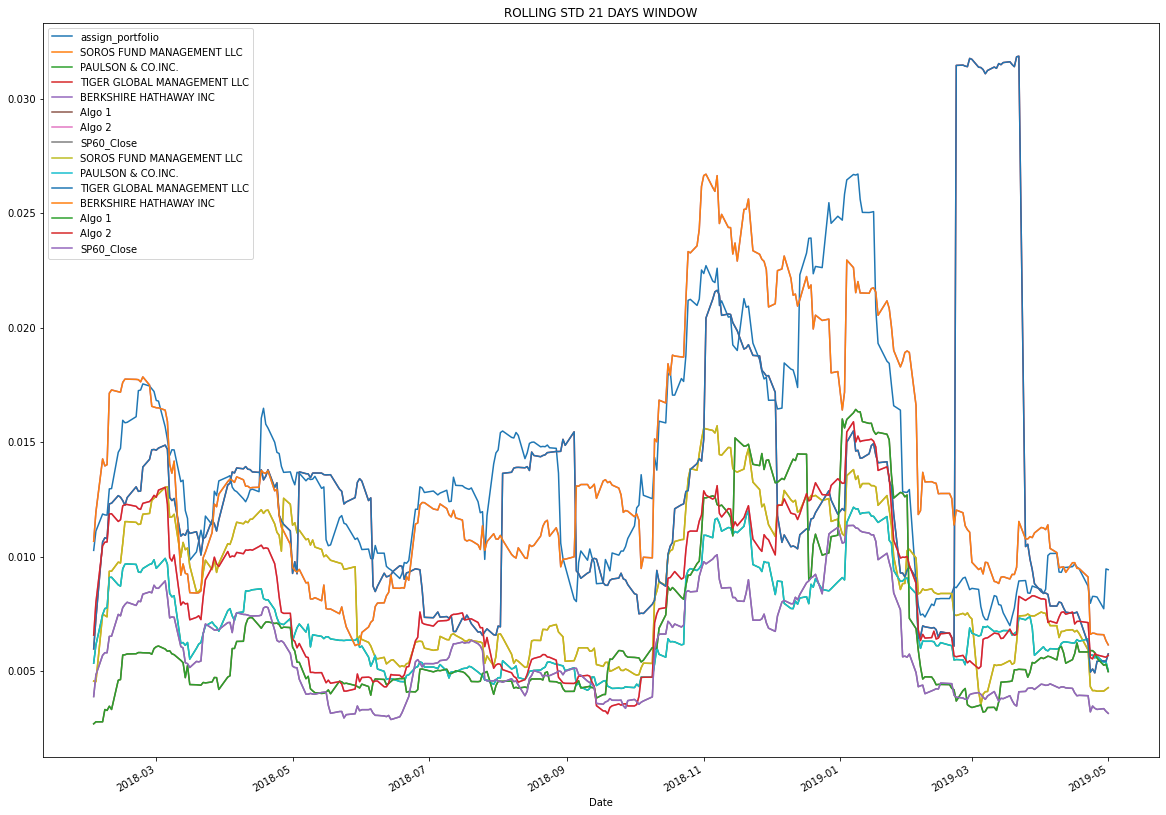

In [55]:
# Calculate rolling standard deviation
portfolio_rolling_21 = portfolio_returns.rolling(window = 21).std()

# Plot rolling standard deviation
portfolio_rolling_21.plot(figsize = (20,15), title = "ROLLING STD 21 DAYS WINDOW")

### Calculate and plot the correlation

<AxesSubplot:>

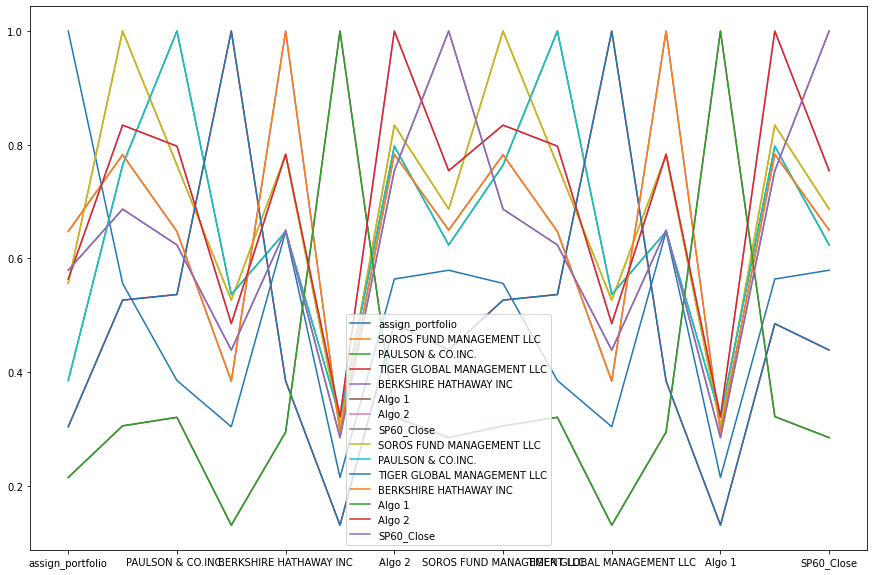

In [56]:
# Calculate and plot the correlation
correlation_portfolio = portfolio_returns.corr()
correlation_portfolio.plot(figsize = (15,10))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'ROLLING BETA OF PORTFOLIO VS S&P 60 TSX'}, xlabel='Date'>

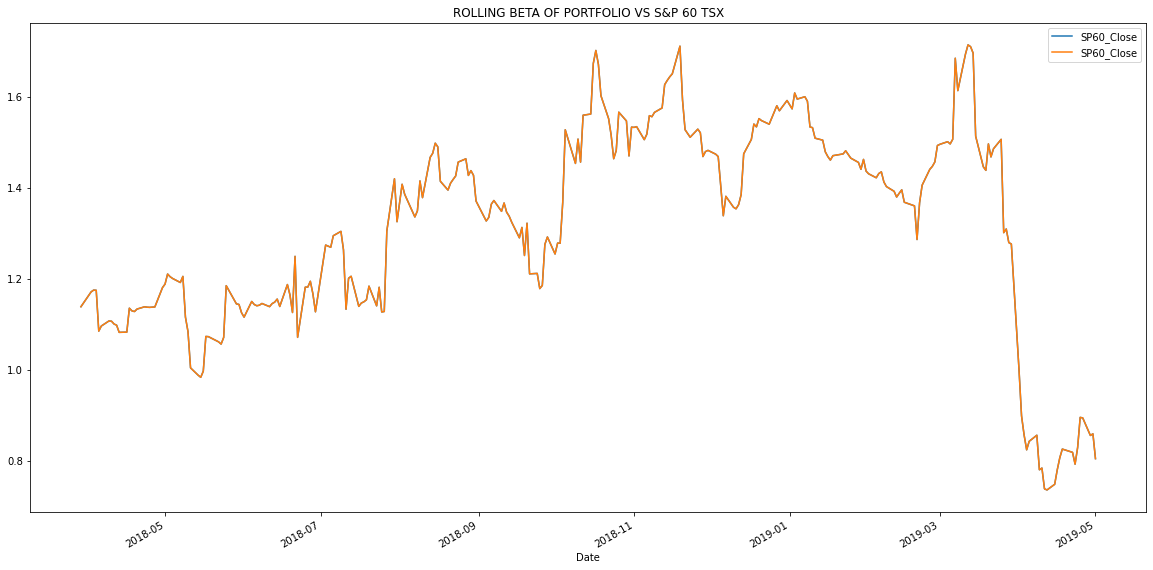

In [57]:
# Calculate and plot Beta

# Calculate covariance of a single portfolio
rolling_covariance_2 = portfolio_returns['assign_portfolio'].rolling(window=60).cov(portfolio_returns['SP60_Close'])

# Calculate variance of SPTSX
rolling_variance_2 = portfolio_returns['SP60_Close'].rolling(window=60).var()

# Computing beta
rolling_beta_2 = rolling_covariance_2 / rolling_variance_2

# Plot beta trend
rolling_beta_2.plot(figsize=(20, 10), title='ROLLING BETA OF PORTFOLIO VS S&P 60 TSX')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [58]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = portfolio_returns.mean()*252/(portfolio_returns.std()*np.sqrt(252))
sharpe_ratios_2

assign_portfolio               1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
SP60_Close                     0.034651
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
SP60_Close                     0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

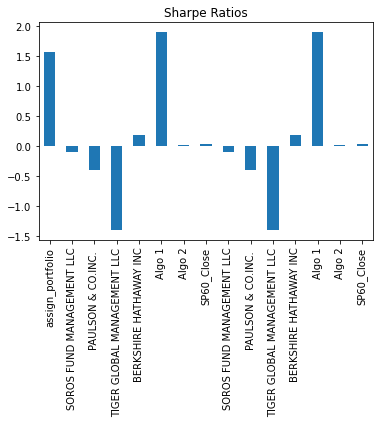

In [59]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

My portfolio has a better ratio of 1.56 compared to SP60. It is performing well